In [ ]:
# Can You Trust Fandango.com's Ratings?
# ECE GAZİOĞLU
# 05.09.2025

In [ ]:
# Fandango.com is a website that you can see movie ratings and also buy tickets from. but is this situation causing any bias? 
# this analysis aimed to answer this question; is Fandango artificially boosting the rating because they also sells tickets?

In [ ]:
 # https://fivethirtyeight.com/features/fandango-movies-ratings/

In [ ]:
# The Data
# This is the data behind the story Be Suspicious Of Online Movie Ratings,especially Fandango’s openly available on 538's github: https://github.com/fivethirtyeight/data. 
# There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.
# fandango_scrape.csv contains every film 538 pulled from Fandango. It has 4 columns; FILM, STARS (Number of stars presented on Fandango),RATING (The Fandango rating value for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.), VOTES (number of people who had reviewed the film at the time we pulled it.]
# all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. 
# The data from Fandango was pulled on Aug. 24, 2015.


In [1]:
# Needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
fandango.duplicated().sum()

0

In [11]:
fandango.describe()
# my first data, "fandango" is a small data that have 504 rows and 4 columns. 
# there are no nulls and duplicates

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


,RATING,VOTES
RATING,1.000000,0.163764
VOTES,0.163764,1.000000


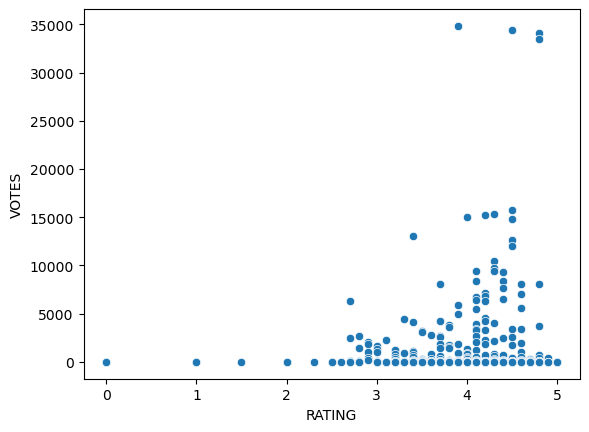

In [13]:
# the relationship between popularity of a film and its rating.
sns.scatterplot(data=fandango,x="RATING",y="VOTES")
fandango[["RATING","VOTES"]].corr()
# in fandango, RATING and VOTES columns' correlation coefficient is too small, but positive
# this means that as expected films with more votes tend to be more liked

In [15]:
fandango.corr(numeric_only=True)
# here i can see stars and rating are not perfectly correlated, 
# there is a little discrepancy between stars and rating that might be in allign with our hypothesis: Fandango might be intervene displayed stars

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [17]:
fandango_copy=fandango.copy()
fandango_copy.sample(5)

,FILM,STARS,RATING,VOTES
165,The 100-Year-Old Man Who Climbed Out the Windo...,4.0,3.9,63
487,Shake the Dust (2015),0.0,0.0,0
420,Stung (2015),4.0,4.0,1
316,Humpback Whales (2015),4.5,4.4,8
200,Premam (2015),5.0,4.5,40


In [19]:
# here as i can see in the FILM column both film name and year displayed, lets split and wrangle that column
fandango_copy["film"]=fandango_copy["FILM"].str.split("(").str[0]
year=fandango_copy["FILM"].str.split("(").str[1]
fandango_copy["year"]=year.str.split(")").str[0]
fandango_copy=fandango_copy.drop("FILM",axis=1)

In [21]:
fandango_copy.columns
fandango_copy.head()
fandango_copy=fandango_copy[["film","year","STARS","RATING","VOTES"]]

In [23]:
fandango_copy=fandango_copy.rename(columns={"STARS":"stars","RATING":"rating","VOTES":"votes"})
fandango_copy.head()
# in order to doing wrangling first we split the FILM column into film and year columns, then a closing pharanthesis remained in year column and i removed that too, then i dropped column FILM that became unnecessary and changed columns names all lowercase

,film,year,stars,rating,votes
0,Fifty Shades of Grey,2015,4.0,3.9,34846
1,Jurassic World,2015,4.5,4.5,34390
2,American Sniper,2015,5.0,4.8,34085
3,Furious 7,2015,5.0,4.8,33538
4,Inside Out,2015,4.5,4.5,15749


In [ ]:
# lets see how many films are in the Fandango data per year?

In [25]:
fandango_copy["year"].value_counts()
# now we see there are some issues here, there shouldnt be "Stratford festival" or "Shi gu" as year..lets go back to our original data and try again

year
2015                  474
2014                   24
Stratford Festival      2
Shi Gu                  1
2016                    1
1964                    1
2012                    1
Name: count, dtype: int64

In [27]:
# with a quick look; 222 Antony and Cleopatra,212 has two years, 280 Lost and Love have issues
fandango.iloc[[212,222,280]]

,FILM,STARS,RATING,VOTES
212,Just the Way You Are (2014) (2015),5.0,4.8,29
222,Antony and Cleopatra (Stratford Festival) (2015),3.5,3.0,25
280,Lost and Love (Shi Gu) (2015),5.0,4.6,12


In [29]:
fandango_copy11=fandango.copy()

In [31]:
fandango_copy11.head()
fandango_copy11.sample(20)
fandango_copy11.iloc[222]
fandango_copy11["FILM"].str.rsplit("(",n=1).iloc[280]
fandango_copy11["FILM"].str.rsplit("(",n=1).str[0].iloc[280]
fandango_copy11["FILM"].str.rsplit("(",n=1).str[1].iloc[222]
fandango_copy11["film"]=fandango_copy11["FILM"].str.rsplit("(",n=1).str[0]
fandango_copy11["year"]=(fandango_copy11["FILM"].str.rsplit("(",n=1).str[1]).str.split(")").str[0]
# here we split FILM column into 2 with rsplit and voila.

In [33]:
fandango_copy11.iloc[222]

FILM      Antony and Cleopatra (Stratford Festival) (2015)
STARS                                                  3.5
RATING                                                 3.0
VOTES                                                   25
film            Antony and Cleopatra (Stratford Festival) 
year                                                  2015
Name: 222, dtype: object

In [35]:
# now i can see count of films per year
fandango_copy11["year"].value_counts()

year
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

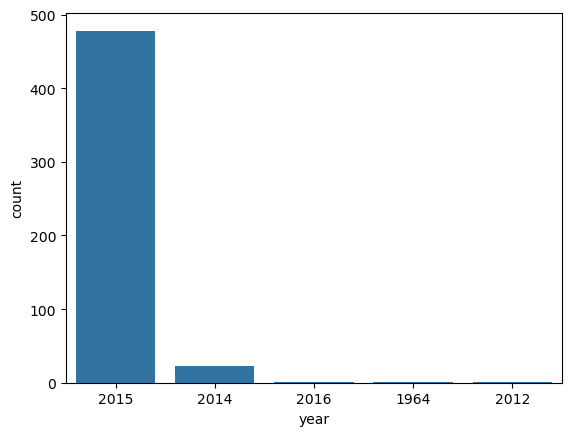

In [37]:
# Visualize the count of movies per year with a plot
sns.countplot(data=fandango_copy11,x="year")

(0.0, 30.0)

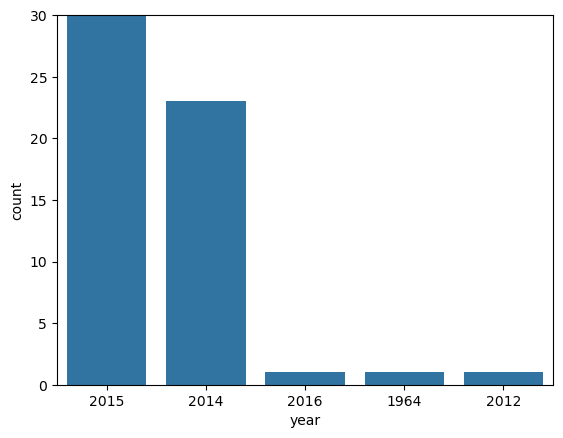

In [45]:
# lets zoom in for the years except 2015
sns.countplot(data=fandango_copy11,x="year")
plt.ylim(0,30)

In [ ]:
# i saw some outliers in the relationship between rating and votes scatterplot before, lets look at them 
# What are the 10 movies with the highest number of votes?

In [39]:
fandango_copy11.sort_values("VOTES",ascending=False).head(10)
# the most popular 10 films
# especially Fifty shades of grey, jurassic world, american sniper and furious 7 seem very popular

,FILM,STARS,RATING,VOTES,film,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,Fifty Shades of Grey,2015
1,Jurassic World (2015),4.5,4.5,34390,Jurassic World,2015
2,American Sniper (2015),5.0,4.8,34085,American Sniper,2015
3,Furious 7 (2015),5.0,4.8,33538,Furious 7,2015
4,Inside Out (2015),4.5,4.5,15749,Inside Out,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,The Hobbit: The Battle of the Five Armies,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,Kingsman: The Secret Service,2015
7,Minions (2015),4.0,4.0,14998,Minions,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,Avengers: Age of Ultron,2015
9,Into the Woods (2014),3.5,3.4,13055,Into the Woods,2014


In [41]:
# How many movies have zero votes?
fandango_copy11[fandango_copy11["VOTES"]==0].shape[0]

69

In [43]:
fandango_copy11[(fandango_copy11["VOTES"] != 0) & ((fandango_copy11["RATING"] == 0) | (fandango_copy11["STARS"] == 0))]

,FILM,STARS,RATING,VOTES,film,year


In [45]:
# since i interested in rated/voted/reviewed films in order to analyze correctness of ratings,i need to create DataFrame of only reviewed films by removing any films that have zero votes.
fandango_copy12=fandango_copy11[fandango_copy11["VOTES"] != 0]

In [47]:
fandango_copy12[fandango_copy12["VOTES"] == 0]

,FILM,STARS,RATING,VOTES,film,year


In [ ]:
# As noted in the article, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

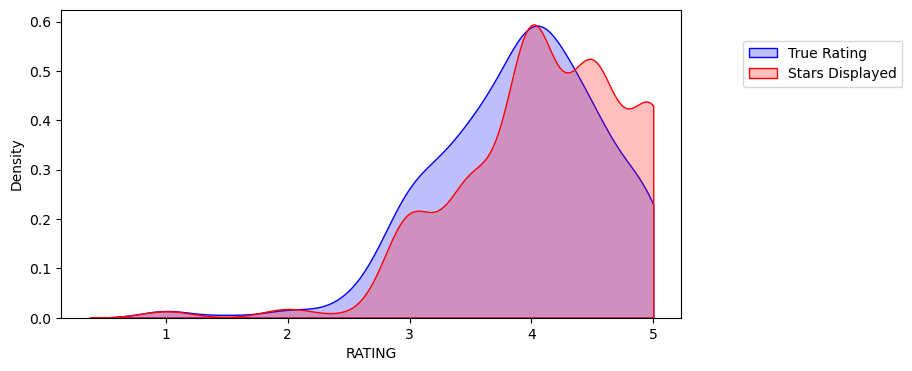

In [49]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=fandango_copy12, x="RATING", fill=True, color="blue", label="True Rating",clip=(0,5))
sns.kdeplot(data=fandango_copy12, x="STARS", fill=True, color="red", label="Stars Displayed",clip=(0,5))

plt.legend(loc=(1.1,0.75))
# here as i can see, in most of the time, true rating is lower than displayed stars

In [51]:
# Let's now actually quantify this discrepancy
fandango_copy12["stars_diff"]=round((fandango_copy12["STARS"]-fandango_copy12["RATING"]),1)
fandango_copy12.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9832\1534931880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_copy12["stars_diff"]=round((fandango_copy12["STARS"]-fandango_copy12["RATING"]),1)


,FILM,STARS,RATING,VOTES,film,year,stars_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,Fifty Shades of Grey,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,Jurassic World,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,American Sniper,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,Furious 7,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,Inside Out,2015,0.0


<Axes: xlabel='stars_diff', ylabel='count'>

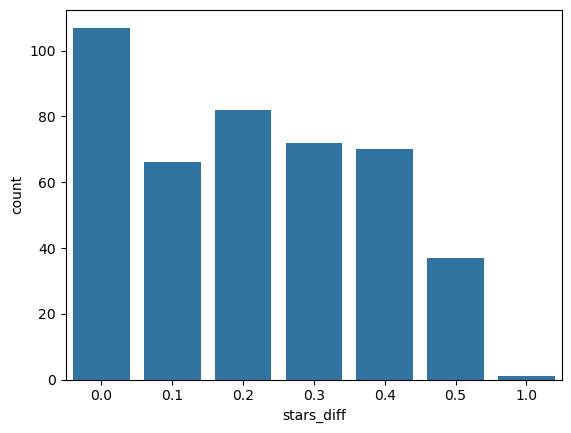

In [53]:
sns.countplot(data=fandango_copy12,x="stars_diff")
# there are quite a lot times that Fandango intervene displayed stars
# also since all diffs are positive, Fandango rounded UP stars!

In [57]:
# There is an occurance that Fandango.com rounded up by full 1 star!
fandango_copy12[fandango_copy12["stars_diff"]>0.5]

,FILM,STARS,RATING,VOTES,film,year,stars_diff
381,Turbo Kid (2015),5.0,4.0,2,Turbo Kid,2015,1.0


In [ ]:
# now lets Compare Fandango Ratings with Other Sites

In [59]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [61]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [63]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [65]:
all_sites.duplicated().sum()

0

In [69]:
# all_sites data is small too, it has 146 non null rows and 8 columns with no duplicates.
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [ ]:
# Let's start with films based on Rotten Tomatoes scores.

,RottenTomatoes,RottenTomatoes_User
RottenTomatoes,1.00000,0.78144
RottenTomatoes_User,0.78144,1.00000


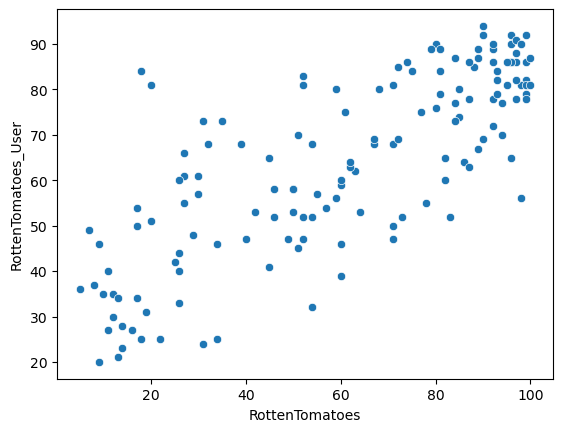

In [71]:
# a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User")
all_sites[["RottenTomatoes","RottenTomatoes_User"]].corr()
# critics' reviews and users' reviews are correlated as expected, but not perfectly.

In [73]:
# Let's quantify this difference by comparing the critics ratings and the RT User ratings.Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.
all_sites["RT_diff"]=all_sites["RottenTomatoes"]-all_sites["RottenTomatoes_User"]
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [75]:
# Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.
abs(all_sites["RT_diff"]).mean()

15.095890410958905

<Axes: xlabel='RT_diff', ylabel='Count'>

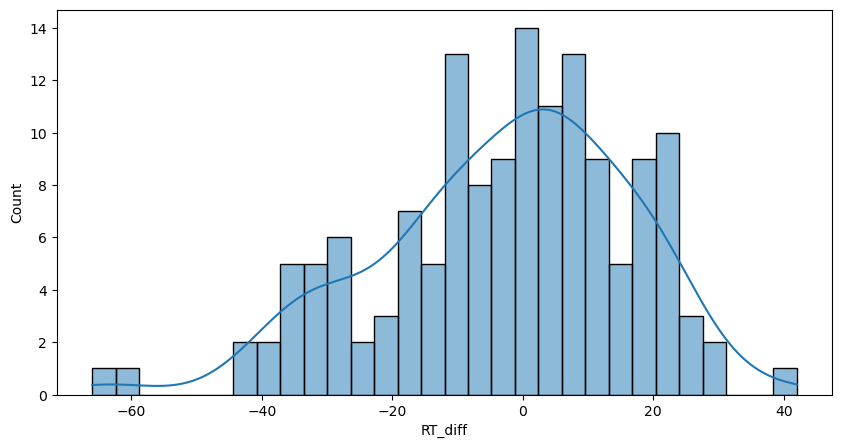

In [77]:
#  the distribution of the differences between RT Critics Score and RT User Score.
plt.figure(figsize=(10,5))
sns.histplot(data=all_sites,x="RT_diff",bins=30,kde=True)
# mostly cumulated around 0 but there are some occurances that difference being quite large like negative 60 or positive 40 that shows conflict in users and critics' reviews

<Axes: xlabel='RT_diff', ylabel='Count'>

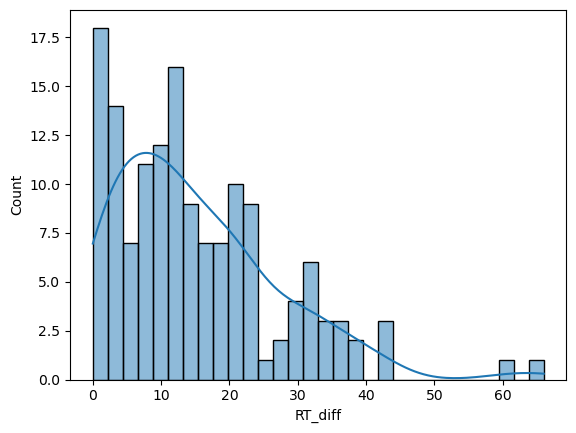

In [79]:
# a distribution showing the absolute value difference
sns.histplot(data=all_sites,x=abs(all_sites["RT_diff"]),bins=30,kde=True)

In [81]:
# Let's find out which movies are causing the largest differences. First, lets see the top 5 movies that users love but critics hate (rotten Tomatoes)
all_sites[["FILM","RT_diff"]].sort_values("RT_diff",ascending=True).head(5)

,FILM,RT_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [83]:
# Critics love, but Users Hate
all_sites[["FILM","RT_diff"]].sort_values("RT_diff",ascending=False).head(5)

,FILM,RT_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


In [ ]:
# lets move on with Metacritic

,Metacritic,Metacritic_User
Metacritic,1.000000,0.723459
Metacritic_User,0.723459,1.000000


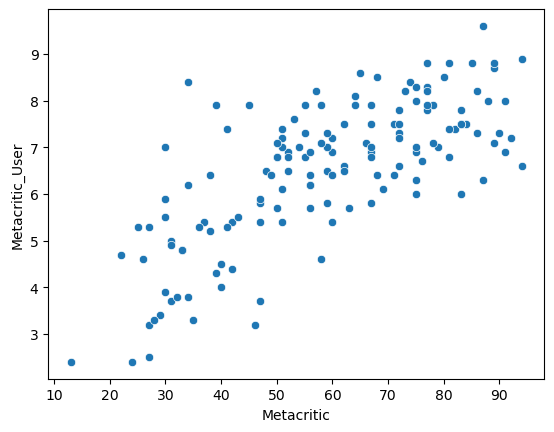

In [85]:
#  a scatterplot of the Metacritic Rating versus the Metacritic User rating.
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User")
all_sites[["Metacritic","Metacritic_User"]].corr()
# again not perfectly but correlated, nothing unusual

In [99]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479,-3.027397
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171,19.156684
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000,-14.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000,0.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000,10.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


,Metacritic_user_vote_count,IMDB_user_vote_count
Metacritic_user_vote_count,1.000000,0.880635
IMDB_user_vote_count,0.880635,1.000000


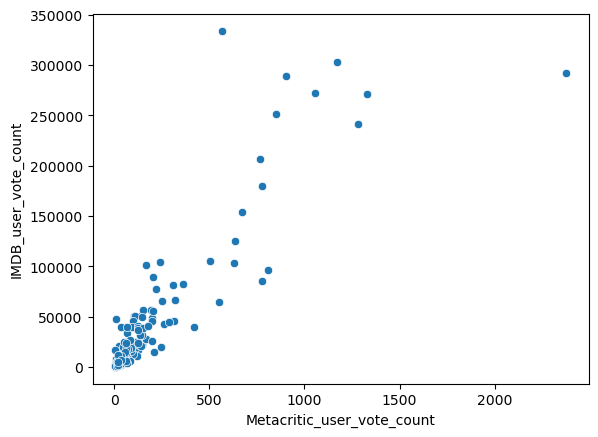

In [89]:
# Finally let's explore IMDB. Notice that both Metacritic and IMDB report vote counts. Let's analyze the most popular movies.
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count")
all_sites[["Metacritic_user_vote_count","IMDB_user_vote_count"]].corr()

In [91]:
# there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?
# IMDB users' favorite
all_sites[all_sites["IMDB_user_vote_count"]==all_sites["IMDB_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [95]:
# Metacritic users' favorite
all_sites[all_sites["Metacritic_user_vote_count"]==all_sites["Metacritic_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [ ]:
# Finally let's begin to explore whether or not Fandango artificially displays higher ratings than other sites to boost ticket sales.
# first lets combine that tables with inner join
# in order to do that i need to make compatible that two table e.g. changing column names or in all_sites table FILM column has both film name and year i need to split them as before i did to fandango table 

In [97]:
fandango_copy11.head()
fandango_copy112=fandango_copy11.copy()
fandango_copy112=fandango_copy112.drop("FILM",axis=1)
fandango_copy112.rename(columns={"film":"FILM"},inplace=True)

In [99]:
# in fandango table there remained a unnecessary space at the end of the film names, i removed that.
print(fandango_copy112["FILM"].iloc[222])
print(fandango_copy112["FILM"].str.strip().iloc[222])

Antony and Cleopatra (Stratford Festival) 
Antony and Cleopatra (Stratford Festival)


In [101]:
fandango_copy112["FILM"]=fandango_copy112["FILM"].str.strip()

In [103]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [105]:
fandango_copy112.head()

,STARS,RATING,VOTES,FILM,year
0,4.0,3.9,34846,Fifty Shades of Grey,2015
1,4.5,4.5,34390,Jurassic World,2015
2,5.0,4.8,34085,American Sniper,2015
3,5.0,4.8,33538,Furious 7,2015
4,4.5,4.5,15749,Inside Out,2015


In [107]:
all_sites_copy11=all_sites.copy()

In [109]:
all_sites_copy11.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [111]:
all_sites_copy11["FILM"].str.rsplit("(",n=1)
all_sites_copy11["film"]=all_sites_copy11["FILM"].str.rsplit("(",n=1).str[0].str.strip()

In [113]:
all_sites_copy11["year"]=all_sites_copy11["FILM"].str.rsplit("(",n=1).str[1].str.split(")").str[0]

In [117]:
all_sites_copy11.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,film,year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,Avengers: Age of Ultron,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,Cinderella,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,Ant-Man,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,Hot Tub Time Machine 2,2015


In [119]:
all_sites_copy11.drop("FILM",axis=1,inplace=True)

In [121]:
all_sites_copy11.rename(columns={"film":"FILM"},inplace=True)

In [123]:
all_sites_copy11.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,FILM,year
0,74,86,66,7.1,7.8,1330,271107,-12,Avengers: Age of Ultron,2015
1,85,80,67,7.5,7.1,249,65709,5,Cinderella,2015
2,80,90,64,8.1,7.8,627,103660,-10,Ant-Man,2015
3,18,84,22,4.7,5.4,31,3136,-66,Do You Believe?,2015
4,14,28,29,3.4,5.1,88,19560,-14,Hot Tub Time Machine 2,2015


In [125]:
# now i can merge them
merged=pd.merge(all_sites_copy11,fandango_copy112,on=["FILM","year"],how="inner")

In [127]:
merged.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,FILM,year,STARS,RATING,VOTES
0,74,86,66,7.1,7.8,1330,271107,-12,Avengers: Age of Ultron,2015,5.0,4.5,14846
1,85,80,67,7.5,7.1,249,65709,5,Cinderella,2015,5.0,4.5,12640
2,80,90,64,8.1,7.8,627,103660,-10,Ant-Man,2015,5.0,4.5,12055
3,18,84,22,4.7,5.4,31,3136,-66,Do You Believe?,2015,5.0,4.5,1793
4,14,28,29,3.4,5.1,88,19560,-14,Hot Tub Time Machine 2,2015,3.5,3.0,1021


In [129]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RottenTomatoes              145 non-null    int64  
 1   RottenTomatoes_User         145 non-null    int64  
 2   Metacritic                  145 non-null    int64  
 3   Metacritic_User             145 non-null    float64
 4   IMDB                        145 non-null    float64
 5   Metacritic_user_vote_count  145 non-null    int64  
 6   IMDB_user_vote_count        145 non-null    int64  
 7   RT_diff                     145 non-null    int64  
 8   FILM                        145 non-null    object 
 9   year                        145 non-null    object 
 10  STARS                       145 non-null    float64
 11  RATING                      145 non-null    float64
 12  VOTES                       145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [ ]:
# Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, i need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [131]:
merged_copy11=merged.copy()

In [135]:
merged_copy11.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,STARS,RATING,VOTES
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,4.086207,3.841379,3817.696552
std,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,0.541169,0.502437,6368.668671
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,3.000000,2.700000,35.000000
25%,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,3.500000,3.500000,218.000000
50%,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,4.000000,3.900000,1430.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,4.500000,4.200000,4279.000000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,5.000000,4.800000,34846.000000


In [137]:
def norm1(x):
    y=(x*5)/100
    z=round(y,1)
    return z
# for RT, RTU, MT columns, beacuse they are in 0-100 scale

In [139]:
def norm2(x):
    k=(x*5)/10
    m=round(k,1)
    return m
## for MTU, IMDB columns, beacuse they are in 0-10 scale

In [141]:
merged_copy11["rt_norm"]=merged_copy11["RottenTomatoes"].apply(norm1)

In [143]:
merged_copy11["rtu_norm"]=merged_copy11["RottenTomatoes_User"].apply(norm1)

In [145]:
merged_copy11["mt_norm"]=merged_copy11["Metacritic"].apply(norm1)

In [147]:
merged_copy11["mtu_norm"]=merged_copy11["Metacritic_User"].apply(norm2)

In [149]:
merged_copy11["imdb_norm"]=merged_copy11["IMDB"].apply(norm2)

In [151]:
merged_copy11.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,FILM,year,STARS,RATING,VOTES,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm
0,74,86,66,7.1,7.8,1330,271107,-12,Avengers: Age of Ultron,2015,5.0,4.5,14846,3.7,4.3,3.3,3.5,3.9
1,85,80,67,7.5,7.1,249,65709,5,Cinderella,2015,5.0,4.5,12640,4.2,4.0,3.4,3.8,3.5
2,80,90,64,8.1,7.8,627,103660,-10,Ant-Man,2015,5.0,4.5,12055,4.0,4.5,3.2,4.0,3.9
3,18,84,22,4.7,5.4,31,3136,-66,Do You Believe?,2015,5.0,4.5,1793,0.9,4.2,1.1,2.4,2.7
4,14,28,29,3.4,5.1,88,19560,-14,Hot Tub Time Machine 2,2015,3.5,3.0,1021,0.7,1.4,1.4,1.7,2.5


In [153]:
# now lets look at relationships over normalized columns, stars and rating belong to the fandango
merged_norm=merged_copy11[["STARS","RATING","rt_norm","rtu_norm","mt_norm","mtu_norm","imdb_norm"]]
merged_norm.head()

,STARS,RATING,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm
0,5.0,4.5,3.7,4.3,3.3,3.5,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.5
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.5


In [ ]:
# Comparing Distribution of Scores across Sites
# Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

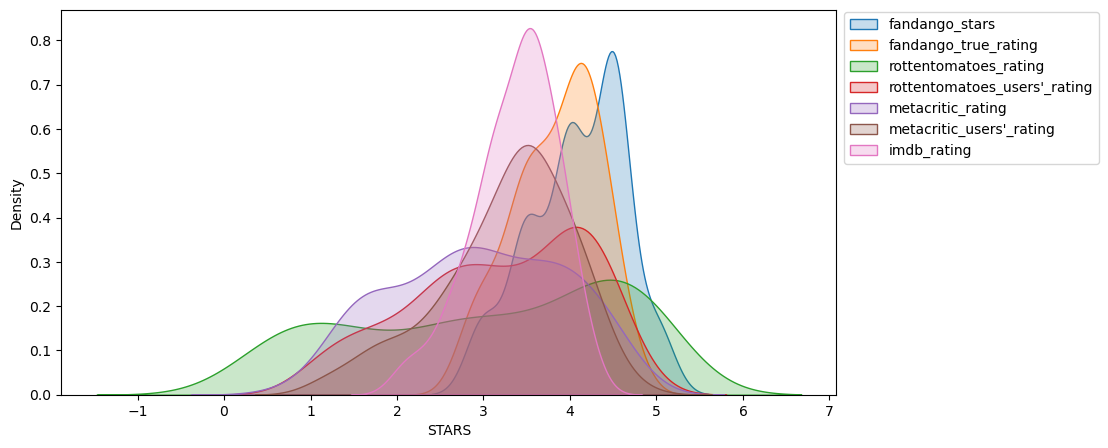

In [161]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=merged_norm,x="STARS",label="fandango_stars",fill=True)
sns.kdeplot(data=merged_norm,x="RATING",label="fandango_true_rating",fill=True)
sns.kdeplot(data=merged_norm,x="rt_norm",label="rottentomatoes_rating",fill=True)
sns.kdeplot(data=merged_norm,x="rtu_norm",label="rottentomatoes_users'_rating",fill=True)
sns.kdeplot(data=merged_norm,x="mt_norm",label="metacritic_rating",fill=True)
sns.kdeplot(data=merged_norm,x="mtu_norm",label="metacritic_users'_rating",fill=True)
sns.kdeplot(data=merged_norm,x="imdb_norm",label="imdb_rating",fill=True)
plt.legend(loc=(1.01,0.6))

In [ ]:
# Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

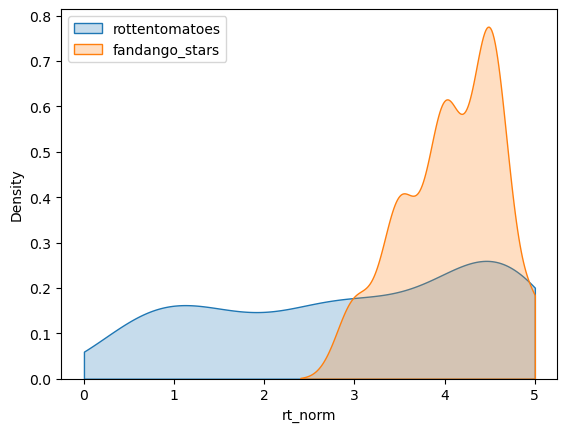

In [163]:
sns.kdeplot(data=merged_norm,x="rt_norm",fill=True,label="rottentomatoes",clip=(0,5))
sns.kdeplot(data=merged_norm,x="STARS",fill=True,label="fandango_stars",clip=(0,5))
plt.legend(loc="upper left")
# notice that every other site has low ratings and high ratings but look at Fandango, they has got no lower ratings below 2.5 !!!

<Axes: ylabel='Count'>

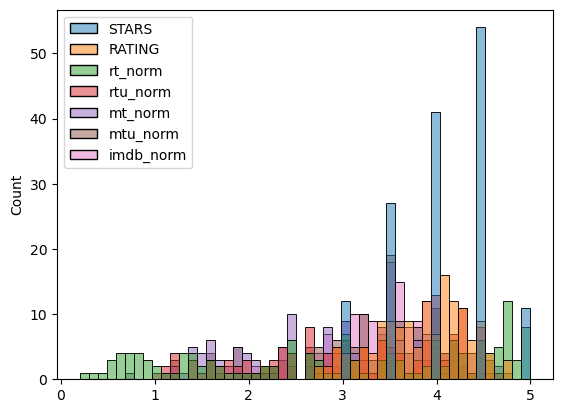

In [165]:
sns.histplot(data=merged_norm,bins=50)
# Notice the Fandango ratings — it seems they used 4.5 stars as the default

In [ ]:
# How are the worst movies rated across all platforms?
# a clustermap visualization of all normalized scores.

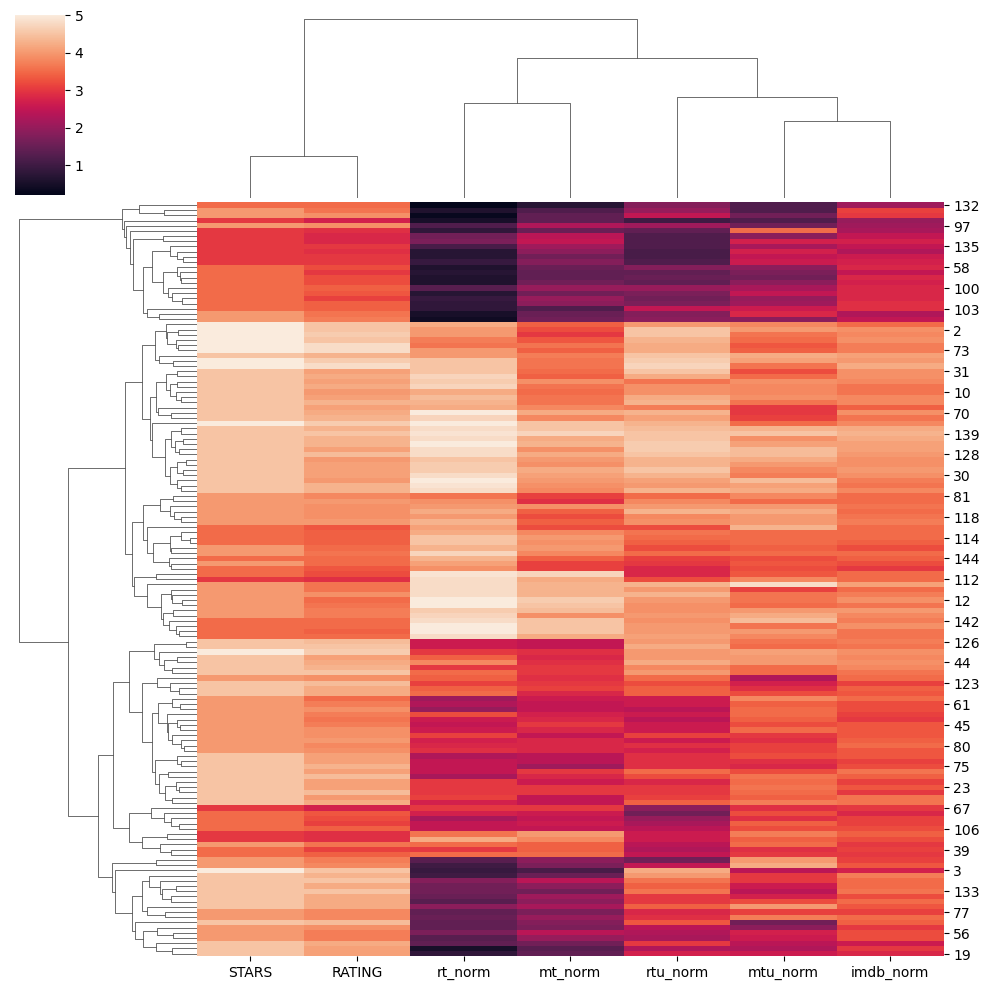

In [167]:
sns.clustermap(data=merged_norm)
# here color gets darker high rateing to low rating; 5 to 1. we expect both light colors and dark colors for even distribution
# but look at fandango column, it has almost no dark colors (low rating)
# also i can see from the darkest shade of the dark colors, the Rotten Tomatoes Critics are the harshest of them all :)

In [ ]:
# Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?
# in order to this investigate i need to add FILM (name) column to the merged_norm table

In [169]:
print(merged_copy11.columns)
print(merged_norm.columns)

Index(['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RT_diff', 'FILM', 'year', 'STARS', 'RATING',
       'VOTES', 'rt_norm', 'rtu_norm', 'mt_norm', 'mtu_norm', 'imdb_norm'],
      dtype='object')
Index(['STARS', 'RATING', 'rt_norm', 'rtu_norm', 'mt_norm', 'mtu_norm',
       'imdb_norm'],
      dtype='object')


In [173]:
print(merged_norm.iloc[111])
print(merged_copy11.iloc[111])

STARS        3.5
RATING       3.4
rt_norm      3.5
rtu_norm     2.5
mt_norm      3.5
mtu_norm     3.0
imdb_norm    3.0
Name: 111, dtype: float64
RottenTomatoes                            71
RottenTomatoes_User                       50
Metacritic                                69
Metacritic_User                          6.1
IMDB                                     6.0
Metacritic_user_vote_count               307
IMDB_user_vote_count                   81679
RT_diff                                   21
FILM                          Into the Woods
year                                    2014
STARS                                    3.5
RATING                                   3.4
VOTES                                  13055
rt_norm                                  3.5
rtu_norm                                 2.5
mt_norm                                  3.5
mtu_norm                                 3.0
imdb_norm                                3.0
Name: 111, dtype: object


In [175]:
merged_norm["FILM"] = merged_copy11["FILM"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9832\1379779695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_norm["FILM"] = merged_copy11["FILM"]


In [177]:
merged_norm.head()

,STARS,RATING,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm,FILM
0,5.0,4.5,3.7,4.3,3.3,3.5,3.9,Avengers: Age of Ultron
1,5.0,4.5,4.2,4.0,3.4,3.8,3.5,Cinderella
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9,Ant-Man
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7,Do You Believe?
4,3.5,3.0,0.7,1.4,1.4,1.7,2.5,Hot Tub Time Machine 2


In [179]:
# snce RottenTomatoes Critics are the harshest, which films are the worst according to them?
merged_norm.sort_values("rt_norm",ascending=True).head(10)

,STARS,RATING,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm,FILM
132,3.5,3.5,0.2,1.8,0.7,1.2,2.1,Paul Blart: Mall Cop 2
105,4.0,3.9,0.3,2.5,1.4,1.6,3.0,Hitman: Agent 47
53,4.0,3.7,0.4,1.9,1.6,1.9,2.5,Hot Pursuit
15,4.5,4.1,0.5,2.3,1.3,2.3,3.0,Taken 3
33,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door
48,3.0,2.7,0.5,1.0,1.4,1.2,2.0,Fantastic Four
35,4.0,3.6,0.6,2.0,1.2,1.2,3.1,The Loft
58,3.5,3.2,0.6,1.8,1.5,1.9,2.8,Seventh Son
59,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai
60,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business


In [ ]:
# Visualize the distribution of ratings across all sites for the top 10 worst movies.

<Axes: ylabel='Density'>

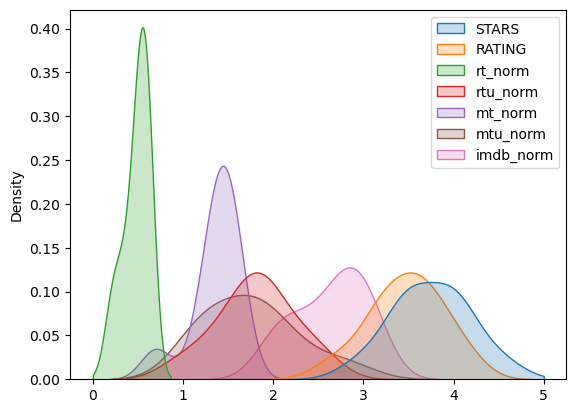

In [183]:
sns.kdeplot(data=merged_norm.sort_values("rt_norm",ascending=True).head(10),fill=True,clip=(0,5))
# Look at those 10 films that are rated worst by Rotten Tomatoes critics: while Rotten Tomatoes rates them around 0, Fandango rates them mostly around 4 out of 5 !!!

In [ ]:
# Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!

In [185]:
merged_norm[merged_norm["FILM"]=="Taken 3"]
# fandango: 4.5  other sites avg: 1.88

,STARS,RATING,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm,FILM
15,4.5,4.1,0.5,2.3,1.3,2.3,3.0,Taken 3


In [187]:
merged_norm[merged_norm["FILM"]=="Paul Blart: Mall Cop 2"]
# fandango: 3.5  other sites avg: 1.2

,STARS,RATING,rt_norm,rtu_norm,mt_norm,mtu_norm,imdb_norm,FILM
132,3.5,3.5,0.2,1.8,0.7,1.2,2.1,Paul Blart: Mall Cop 2


In [ ]:
# THANK YOU